<a href="https://colab.research.google.com/github/Shuaib11-Github/Important-concepts/blob/main/KMeans_For_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

In [10]:
X,y = load_iris(return_X_y=True, as_frame=True)
df = pd.concat([X,y],axis=1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
df_petal = df[['petal length (cm)',	'petal width (cm)',	'target']]
df_petal

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


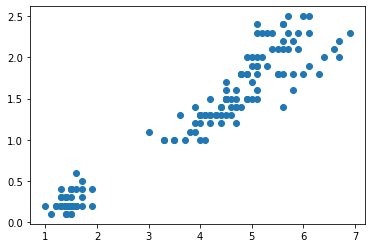

In [13]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

In [19]:
km = KMeans(n_clusters=3)
pred = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [20]:
df_petal['cluster'] = pred
df_petal

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,petal length (cm),petal width (cm),target,cluster
0,1.4,0.2,0,1
1,1.4,0.2,0,1
2,1.3,0.2,0,1
3,1.5,0.2,0,1
4,1.4,0.2,0,1
...,...,...,...,...
145,5.2,2.3,2,0
146,5.0,1.9,2,0
147,5.2,2.0,2,0
148,5.4,2.3,2,0


In [21]:
km.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

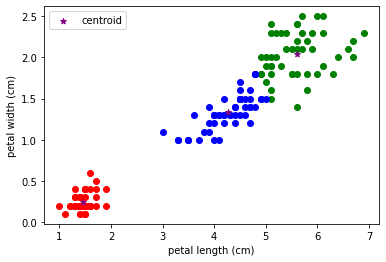

In [26]:
df1 = df_petal[df_petal.cluster==0]
df2 = df_petal[df_petal.cluster==1]
df3 = df_petal[df_petal.cluster==2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color ='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color ='red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color ='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

In [32]:
scaler = MinMaxScaler()
scaler.fit(df_petal[['petal length (cm)']])
df_petal['petal length (cm)'] = scaler.transform(df_petal[['petal length (cm)']])

scaler.fit(df_petal[['petal width (cm)']])
df_petal['petal width (cm)'] = scaler.transform(df_petal[['petal width (cm)']])
df_petal

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,petal length (cm),petal width (cm),target,cluster
0,0.067797,0.041667,0,1
1,0.067797,0.041667,0,1
2,0.050847,0.041667,0,1
3,0.084746,0.041667,0,1
4,0.067797,0.041667,0,1
...,...,...,...,...
145,0.711864,0.916667,2,0
146,0.677966,0.750000,2,0
147,0.711864,0.791667,2,0
148,0.745763,0.916667,2,0


In [49]:
print('0 cluster:',len(df_petal[df_petal['cluster']==0]))
print('1 cluster:',len(df_petal[df_petal['cluster']==1]))
print('2 cluster:',len(df_petal[df_petal['cluster']==2]))

0 cluster: 48
1 cluster: 50
2 cluster: 52


# Elbow plot

In [42]:
sse = []
k_rng = range(1,10)
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df_petal[['petal length (cm)','petal width (cm)']])
  sse.append(km.inertia_)

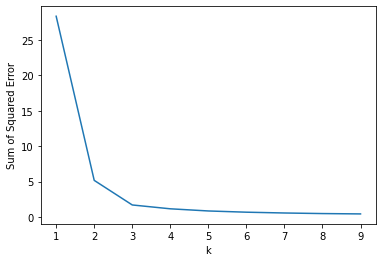

In [43]:
plt.xlabel('k')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng, sse)

- Optimal K value is : 3 for petal length and petal width features